In [74]:
import pandas as pd
import numpy as np
import urllib.request
import os
import seaborn
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix 
from scipy import stats
from statsmodels.formula.api import ols

<b>3.1.1. Data Representation and Interaction 

In [53]:
# creating dataframe
df = pd.read_csv('brain_size.csv', sep = ';', na_values = '.')
df.head()

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437
3,4,Male,133,129,128,172.0,68.8,965353
4,5,Female,137,132,134,147.0,65.0,951545


In [9]:
# Creating from arrays
t = np.linspace(-6,6,20)
sin_t = np.sin(t)
cos_t = np.cos(t)

# expose as pandas dataframe
pd.DataFrame({'t':t, 'sin':sin_t, 'cos':cos_t})

,t,sin,cos
0,-6.000000,0.279415,0.960170
1,-5.368421,0.792419,0.609977
2,-4.736842,0.999701,0.024451
3,-4.105263,0.821291,-0.570509
4,-3.473684,0.326021,-0.945363
5,-2.842105,-0.295030,-0.955488
6,-2.210526,-0.802257,-0.596979
7,-1.578947,-0.999967,-0.008151
8,-0.947368,-0.811882,0.583822
9,-0.315789,-0.310567,0.950551


In [10]:
# Manipulating Data
df.shape

(40, 8)

In [11]:
df.columns

Index(['Unnamed: 0', 'Gender', 'FSIQ', 'VIQ', 'PIQ', 'Weight', 'Height',
       'MRI_Count'],
      dtype='object')

In [12]:
print(df['Gender'])

0     Female
1       Male
2       Male
3       Male
4     Female
5     Female
6     Female
7     Female
8       Male
9       Male
10    Female
11      Male
12      Male
13    Female
14    Female
15    Female
16    Female
17      Male
18    Female
19      Male
20      Male
21      Male
22    Female
23      Male
24    Female
25      Male
26    Female
27      Male
28    Female
29    Female
30    Female
31      Male
32      Male
33      Male
34    Female
35    Female
36      Male
37    Female
38      Male
39      Male
Name: Gender, dtype: object


In [13]:
df[df['Gender'] == 'Female']['VIQ'].mean()

109.45

In [14]:
# groupby to split data frame by categorical variables
groupby_gender = df.groupby('Gender')
for gender, value in groupby_gender['VIQ']:
    print((gender, value.mean()))

('Female', 109.45)
('Male', 115.25)


In [15]:
groupby_gender.mean()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Gender,,,,,,,
Female,19.65,111.9,109.45,110.45,137.200000,65.765000,862654.6
Male,21.35,115.0,115.25,111.60,166.444444,71.431579,954855.4


In [16]:
# mean value for VIQ of full population 
df['VIQ'].mean()

112.35

In [17]:
# males/females include in study 
df['Gender'].count()

40

array([[<AxesSubplot:xlabel='Weight', ylabel='Weight'>,
        <AxesSubplot:xlabel='Height', ylabel='Weight'>,
        <AxesSubplot:xlabel='MRI_Count', ylabel='Weight'>],
       [<AxesSubplot:xlabel='Weight', ylabel='Height'>,
        <AxesSubplot:xlabel='Height', ylabel='Height'>,
        <AxesSubplot:xlabel='MRI_Count', ylabel='Height'>],
       [<AxesSubplot:xlabel='Weight', ylabel='MRI_Count'>,
        <AxesSubplot:xlabel='Height', ylabel='MRI_Count'>,
        <AxesSubplot:xlabel='MRI_Count', ylabel='MRI_Count'>]],
      dtype=object)

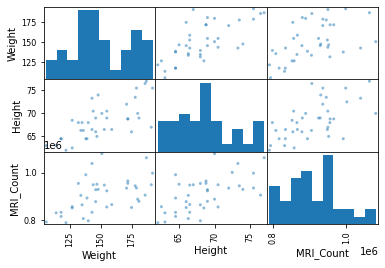

In [29]:
scatter_matrix(df[['Weight', 'Height', 'MRI_Count']])

array([[<AxesSubplot:xlabel='PIQ', ylabel='PIQ'>,
        <AxesSubplot:xlabel='VIQ', ylabel='PIQ'>,
        <AxesSubplot:xlabel='FSIQ', ylabel='PIQ'>],
       [<AxesSubplot:xlabel='PIQ', ylabel='VIQ'>,
        <AxesSubplot:xlabel='VIQ', ylabel='VIQ'>,
        <AxesSubplot:xlabel='FSIQ', ylabel='VIQ'>],
       [<AxesSubplot:xlabel='PIQ', ylabel='FSIQ'>,
        <AxesSubplot:xlabel='VIQ', ylabel='FSIQ'>,
        <AxesSubplot:xlabel='FSIQ', ylabel='FSIQ'>]], dtype=object)

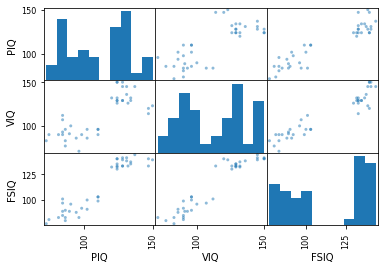

In [31]:
scatter_matrix(df[['PIQ', 'VIQ', 'FSIQ']])

array([[<AxesSubplot:xlabel='PIQ', ylabel='PIQ'>,
        <AxesSubplot:xlabel='VIQ', ylabel='PIQ'>,
        <AxesSubplot:xlabel='FSIQ', ylabel='PIQ'>],
       [<AxesSubplot:xlabel='PIQ', ylabel='VIQ'>,
        <AxesSubplot:xlabel='VIQ', ylabel='VIQ'>,
        <AxesSubplot:xlabel='FSIQ', ylabel='VIQ'>],
       [<AxesSubplot:xlabel='PIQ', ylabel='FSIQ'>,
        <AxesSubplot:xlabel='VIQ', ylabel='FSIQ'>,
        <AxesSubplot:xlabel='FSIQ', ylabel='FSIQ'>]], dtype=object)

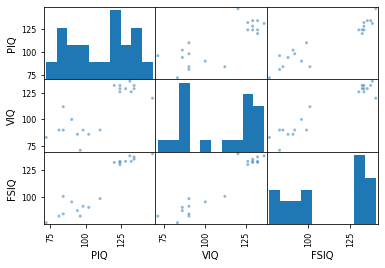

In [41]:
# scatter matrix only females
df_f = df.loc[df['Gender'] == 'Female']
scatter_matrix(df_f[['PIQ', 'VIQ', 'FSIQ']])

array([[<AxesSubplot:xlabel='PIQ', ylabel='PIQ'>,
        <AxesSubplot:xlabel='VIQ', ylabel='PIQ'>,
        <AxesSubplot:xlabel='FSIQ', ylabel='PIQ'>],
       [<AxesSubplot:xlabel='PIQ', ylabel='VIQ'>,
        <AxesSubplot:xlabel='VIQ', ylabel='VIQ'>,
        <AxesSubplot:xlabel='FSIQ', ylabel='VIQ'>],
       [<AxesSubplot:xlabel='PIQ', ylabel='FSIQ'>,
        <AxesSubplot:xlabel='VIQ', ylabel='FSIQ'>,
        <AxesSubplot:xlabel='FSIQ', ylabel='FSIQ'>]], dtype=object)

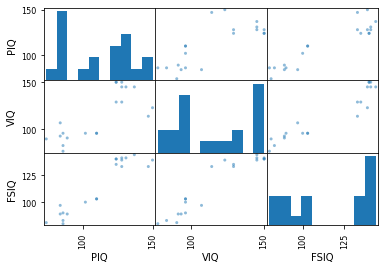

In [42]:
# scatter matrix only males
scatter_matrix(df.loc[df['Gender'] == 'Male'][['PIQ', 'VIQ', 'FSIQ']])

<b> 3.1.2 Hypothesis Testing: Comparing Two Groups

In [44]:
# 1 sample t-test (test value of population mean)
stats.ttest_1samp(df['VIQ'],0)

Ttest_1sampResult(statistic=30.088099970849328, pvalue=1.3289196468728067e-28)

In [45]:
# 2 sample t-test (test for difference across populations)
female_viq = df[df['Gender'] == 'Female']['VIQ']
male_viq = df[df['Gender'] == 'Male']['VIQ']
stats.ttest_ind(female_viq, male_viq)                        

Ttest_indResult(statistic=-0.7726161723275011, pvalue=0.44452876778583217)

In [47]:
# paired test (repeated measurements on same individuels)
stats.ttest_ind(df['FSIQ'], df['PIQ'])

Ttest_indResult(statistic=0.465637596380964, pvalue=0.6427725009414841)

In [48]:
stats.ttest_rel(df['FSIQ'], df['PIQ'])
# stats.ttest_1samp(df['FSIQ']- df['PIQ'], 0)

Ttest_relResult(statistic=1.7842019405859857, pvalue=0.08217263818364236)

In [49]:
stats.wilcoxon(df['FSIQ'], df['PIQ'])

WilcoxonResult(statistic=274.5, pvalue=0.10659492713506856)

In [54]:
# Test the difference between weights in males and females
female_weight = df[df['Gender'] == 'Female']['Weight'] 
male_weight = df[df['Gender'] == 'Male']['Weight']
stats.ttest_ind(female_weight, male_weight)

Ttest_indResult(statistic=nan, pvalue=nan)

<b>3.1.3 Linear Models, Multiple Factors, and Analysis of Variance

In [59]:
x = np.linspace(-5, 5, 20)
np.random.seed(1)
y = -5 + 3*x + 4 * np.random.normal(size = x.shape)
data = pd.DataFrame({'x':x, 'y':y})

# specify OLS model
model = ols('y~x', data).fit()

# inspect stats from fit 
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     74.03
Date:                Sat, 17 Sep 2022   Prob (F-statistic):           8.56e-08
Time:                        14:41:26   Log-Likelihood:                -57.988
No. Observations:                  20   AIC:                             120.0
Df Residuals:                      18   BIC:                             122.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.5335      1.036     -5.342      0.0

In [60]:
# get estimated parameters from model
model.params

Intercept   -5.533459
x            2.936888
dtype: float64

In [61]:
# categorical variables: comparing groups or multiple categories
model = ols("VIQ ~ Gender + 1", df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    VIQ   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.5969
Date:                Sat, 17 Sep 2022   Prob (F-statistic):              0.445
Time:                        14:51:13   Log-Likelihood:                -182.42
No. Observations:                  40   AIC:                             368.8
Df Residuals:                      38   BIC:                             372.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        109.4500      5.308     20.

In [63]:
# multiple regression
df2 = pd.read_csv('iris.csv')
model = ols('sepal_width ~ name + petal_length', df2).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            sepal_width   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     44.63
Date:                Sat, 17 Sep 2022   Prob (F-statistic):           1.58e-20
Time:                        15:00:46   Log-Likelihood:                -38.185
No. Observations:                 150   AIC:                             84.37
Df Residuals:                     146   BIC:                             96.41
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.9813      0

In [64]:
print(model.f_test([0,1,-1,0]))

<F test: F=array([[3.24533535]]), p=0.07369058781700738, df_denom=146, df_num=1>


In [73]:
if not os.path.exists('wages.txt'):
    urllib.request.urlretrieve('http://lib.stat.cmu.edu/datasets/CPS_85_Wages',
                       'wages.txt')
# name for columns
names = [
    'EDUCATION: Number of years of education',
    'SOUTH: 1=Person lives in South, 0=Person lives elsewhere',
    'SEX: 1=Female, 0=Male',
    'EXPERIENCE: Number of years of work experience',
    'UNION: 1=Union member, 0=Not union member',
    'WAGE: Wage (dollars per hour)',
    'AGE: years',
    'RACE: 1=Other, 2=Hispanic, 3=White',
    'OCCUPATION: 1=Management, 2=Sales, 3=Clerical, 4=Service, 5=Professional, 6=Other',
    'SECTOR: 0=Other, 1=Manufacturing, 2=Construction',
    'MARR: 0=Unmarried,  1=Married',
]

short_names = [n.split(':')[0] for n in names]

data = pd.read_csv('wages.txt', skiprows=27, skipfooter=6, sep=None,
                       header=None)
data.columns = short_names

# Log-transform the wages
import numpy as np
data['WAGE'] = np.log10(data['WAGE'])

data.head()

<ipython-input-73-f4140adb91d9>:21: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  data = pd.read_csv('wages.txt', skiprows=27, skipfooter=6, sep=None,


,EDUCATION,SOUTH,SEX,EXPERIENCE,UNION,WAGE,AGE,RACE,OCCUPATION,SECTOR,MARR
0,8,0,1,21,0,0.707570,35,2,6,1,1
1,9,0,1,42,0,0.694605,57,3,6,1,1
2,12,0,0,1,0,0.824126,19,3,6,1,0
3,12,0,0,4,0,0.602060,22,3,6,0,0
4,12,0,0,17,0,0.875061,35,3,6,0,1


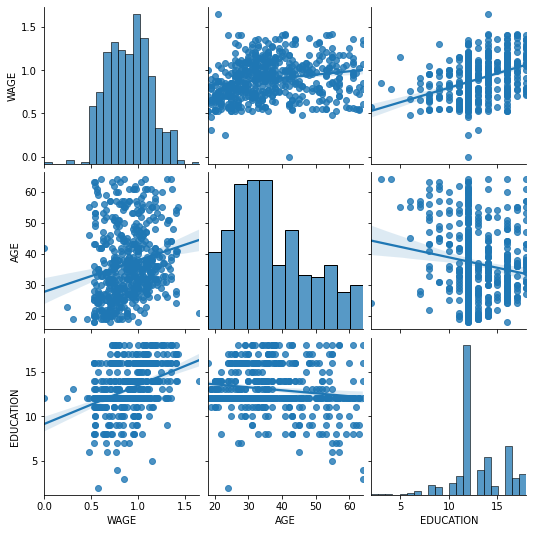

In [76]:
# pairplot scatter matrices
seaborn.pairplot(data, vars = ['WAGE', 'AGE', 'EDUCATION'], kind = 'reg')

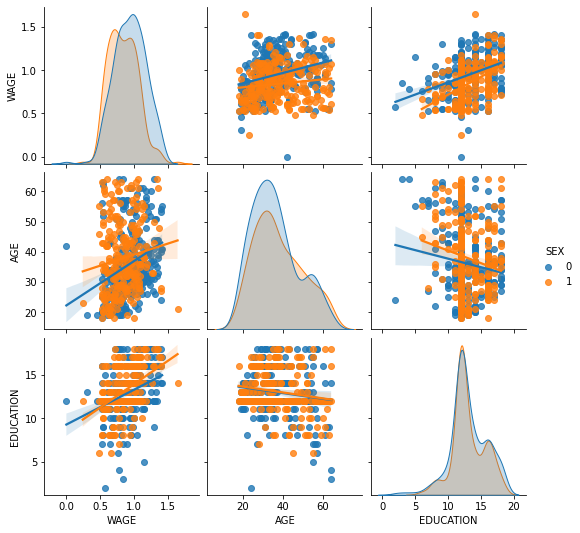

In [77]:
seaborn.pairplot(data,vars=['WAGE','AGE','EDUCATION'],kind='reg',hue='SEX')

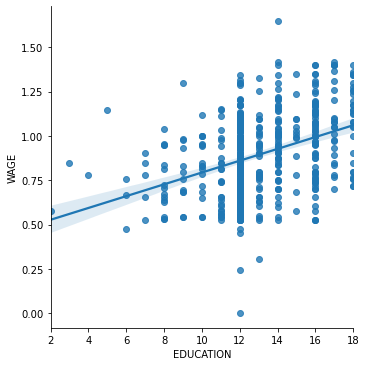

In [78]:
# plot a univariate regression
seaborn.lmplot(y='WAGE', x='EDUCATION', data = data)

In [84]:
# Test for interactions 
result = ols(formula = 'WAGE ~ EDUCATION + SEX + EDUCATION * SEX', data=data).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   WAGE   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     43.72
Date:                Sat, 17 Sep 2022   Prob (F-statistic):           2.94e-25
Time:                        15:38:11   Log-Likelihood:                 88.503
No. Observations:                 534   AIC:                            -169.0
Df Residuals:                     530   BIC:                            -151.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.5748      0.058      9.861